# Importieren von Biblioteken

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Einlesen der Daten

In [2]:
df = pd.read_csv("./data/dataset.csv")
print("Dataset loaded successfully!")
print(f"Shape: {df.shape}")

# Speichern für die spätere Verwendung (Ende des Skripts)
rows_at_begin = df.shape[0]

Dataset loaded successfully!
Shape: (8662, 22)


# Allgemeine Information der Daten und Säubern der Daten

In [3]:
df.head()

,Customer_ID,CCreditScore,CGeography,CGender,CAge,CTenure,CBalance,CNumOfProducts,CHasCrCard,CIsActiveMember,...,Account_Age_Months,Avg_Monthly_Transactions,Transaction_Variance,Last_Login_Days_Ago,Support_Tickets_Count,Mobile_App_Usage_Hours,Onboarding_Month,Is_Holiday_Onboarding,Churn,CLV_Continuous
0,CUST_000001,553.295220,France,Male,39,2,131008.168572,1,1,0,...,36.942433,8,4.959478,1.094710,1,7.979899,8,0,0,21696.256022
1,CUST_000002,552.939394,France,Male,33,4,118529.788812,1,0,0,...,23.748871,11,9.866506,14.809607,0,11.565167,11,0,0,15918.891128
2,CUST_000003,688.745934,Spain,Male,40,1,-879.724555,2,1,1,...,1.114543,13,6.178311,26.434273,0,3.331838,2,0,0,10361.315773
3,CUST_000004,771.940664,France,Male,40,9,125563.132706,1,1,0,...,1.662811,12,4.509500,18.540471,2,12.714742,1,1,0,15189.776245
4,CUST_000005,484.092560,France,Male,55,5,95759.918567,1,0,1,...,24.007725,8,18.786985,11.893918,1,0.719512,2,0,0,14631.814966


In [4]:
# Informationen der Spalten anzeigen: Null-Values und Datentypen
print(df.info())

# Nullwerte explizit ausgeben
null_counts = df.isnull().sum()
print("="*25, "How much null values are in each column", "="*25)
print(null_counts[null_counts > 0])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8662 entries, 0 to 8661
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Customer_ID               8662 non-null   object 
 1   CCreditScore              8662 non-null   float64
 2   CGeography                8662 non-null   object 
 3   CGender                   8662 non-null   object 
 4   CAge                      8662 non-null   int64  
 5   CTenure                   8662 non-null   int64  
 6   CBalance                  8585 non-null   float64
 7   CNumOfProducts            8662 non-null   int64  
 8   CHasCrCard                8662 non-null   int64  
 9   CIsActiveMember           8662 non-null   int64  
 10  CEstimatedSalary          7884 non-null   float64
 11  Days_Since_Onboarding     8662 non-null   float64
 12  Account_Age_Months        8662 non-null   float64
 13  Avg_Monthly_Transactions  8662 non-null   int64  
 14  Transact

In [5]:
# Duplikate finden und ggf. behandeln
print("Es gibt", df[df.duplicated()].shape[0], "duplizierte Zeilen im DataFrame.")

Es gibt 0 duplizierte Zeilen im DataFrame.


#### Überprüfe und Säubere Identifier

In [6]:
# Prüfe Customer_ID Format und dass jeder Customer eine ID hat
print("Es gibt folgende fehlerhafte Customer_IDs, die nicht \"CUST\" im Namen besitzen: ", df[df["Customer_ID"].str.split("_").str[0] != "CUST"].count().values[0])
print("Es gibt folgende fehlerhafte Customer_IDs, die nicht die länge von 6 Ziffern aufweisen: ", df[df["Customer_ID"].str.split("_").str[1].str.len() != 6].count().values[0])
print("Es gibt folgende fehlerhafte Customer_IDs, die keine numerischen Werte aufweisen: ", len(df["Customer_ID"].str.split("_").str[1].astype(int).values) if not 8662 else 0)

Es gibt folgende fehlerhafte Customer_IDs, die nicht "CUST" im Namen besitzen:  0
Es gibt folgende fehlerhafte Customer_IDs, die nicht die länge von 6 Ziffern aufweisen:  0
Es gibt folgende fehlerhafte Customer_IDs, die keine numerischen Werte aufweisen:  0


#### Überprüfe und Säubere Customer Demographics 

In [7]:
# Spaltennamen mit den erwarteten Spaltennamen (France, Germany, Spain) vergleichen!
print("Unique countries: ", df['CGeography'].unique())

Unique countries:  ['France' 'Spain' 'Germany' 'SPAIN' 'Fr' 'GERMANY' 'DE' 'spain' 'ES'
 'germany' 'france']


In [8]:
# Ordne jedem Land die korrekten Bezeichnungen zu
df['CGeography'] = df['CGeography'].replace({'Fr': 'France', "france": 'France'})
df['CGeography'] = df['CGeography'].replace({'GERMANY': 'Germany', "DE": 'Germany', "germany": 'Germany'})
df['CGeography'] = df['CGeography'].replace({'SPAIN': 'Spain', "spain": 'Spain', "ES": 'Spain'})

# Überprüfe die einzigartigen Ländernamen erneut
print("Einzigartige Länder nach der Korrektur: ", df['CGeography'].unique())

Einzigartige Länder nach der Korrektur:  ['France' 'Spain' 'Germany']


In [9]:
# Überprüfe, ob das Gehalt mit dem Kredit-Score zusammenhängt pro Land
germany_data = df[df['CGeography'] == 'Germany'][['CCreditScore', 'CEstimatedSalary']]
spain_data = df[df['CGeography'] == 'Spain'][['CCreditScore', 'CEstimatedSalary']]
france_data = df[df['CGeography'] == 'France'][['CCreditScore', 'CEstimatedSalary']]

print("\nFür Deutschland sortiert nach CCreditScore (aufsteigend):")
germany_sorted = germany_data.sort_values('CCreditScore')
print(germany_sorted.head(10))

print("\nFür Spanien sortiert nach CCreditScore (aufsteigend):")
spain_data = spain_data.sort_values('CCreditScore')
print(spain_data.head(10))

print("\nFür Frankreich sortiert nach CCreditScore (aufsteigend):")
france_data = france_data.sort_values('CCreditScore')
print(france_data.head(10))


Für Deutschland sortiert nach CCreditScore (aufsteigend):
      CCreditScore  CEstimatedSalary
2108      0.000000      76204.573000
7275      0.000000     119122.582218
7082      0.000000     102184.456050
4371      0.000000       5659.346530
8576      0.000000     185977.261285
8170    402.120183     176625.357361
7080    402.376014      71966.790507
6005    407.673710      92604.079151
2828    410.236847      98022.673693
4580    415.604882     158313.666226

Für Spanien sortiert nach CCreditScore (aufsteigend):
      CCreditScore  CEstimatedSalary
3030      0.000000     187492.510326
199       0.000000      34591.485075
7116    363.927239     102626.457556
8357    409.868237     113755.261608
7402    411.116075      21532.756947
358     411.294329      96630.528457
286     415.464889      60445.952614
6307    417.320459      14701.071458
5957    417.763114     135294.698860
1713    420.403219     144845.021619

Für Frankreich sortiert nach CCreditScore (aufsteigend):
      CCreditS

Die Auswertung zeigt eindeutig, dass die Kredit-Scores nicht mit dem Gehalt zusammenhängen können. Deshalb entscheide ich mich dafür, die Nullwerte in den Gehältern mit den mean-values (Mittelwerten) des jeweiligen Landes aufzufüllen. Hierbei entscheide ich mich bewusst für die Gehälter des jeweiligen Landes, da das Lohngefüge unterschiedlich ist.

In [10]:
# Fülle Nullwerte mit den durchschnittlichen Gehältern des jeweiligen Landes

# Null-Werte vor der Behandlung
print("Null-Werte vor der Behandlung:")
for country in ['Germany', 'Spain', 'France']:
    null_count = df[(df['CGeography'] == country) & (df['CEstimatedSalary'].isnull())].shape[0]
    print(f"{country}: {null_count}")

# Mit fillna() - die saubere Lösung für alle Länder auf einmal
df['CEstimatedSalary'] = df.groupby('CGeography')['CEstimatedSalary'].transform(
    lambda x: x.fillna(x.mean())
)

# Null-Werte nach der Behandlung
print("\nNull-Werte nach der Behandlung:")
print(f"CEstimatedSalary gesamt: {df['CEstimatedSalary'].isnull().sum()}")

Null-Werte vor der Behandlung:
Germany: 162
Spain: 219
France: 397

Null-Werte nach der Behandlung:
CEstimatedSalary gesamt: 0


In [11]:
# Suche einen Zusammenhang zwischen negativem Kontostand und Gehalt, Kredit-Score, Alter
df[df['CBalance'] < 0].sort_values(by=['CBalance'], ascending=True)[['CEstimatedSalary', 'CBalance', 'CCreditScore', 'CAge']]

,CEstimatedSalary,CBalance,CCreditScore,CAge
5067,125275.729302,-7218.834421,601.813964,31
6733,101214.306199,-6318.821307,621.521621,34
429,35745.498370,-6232.571927,569.145246,47
6680,89729.235369,-6051.110854,498.370343,47
961,64540.067449,-5770.316433,672.959336,43
...,...,...,...,...
7773,70428.508764,-9.436117,703.551191,44
983,45844.513040,-7.754597,580.184263,38
706,187159.756162,-7.323913,661.633583,20
72,30690.266951,-6.509066,581.795665,37


Es ist kein Zusammenhang der CBalance erkennbar. Demnach gehe ich davon aus, dass diese irgendwie berechnet wurde. Folglich könnte man entweder Nullwerte aus der Spalte komplett entfernen oder mit random choice vergeben, um die Zeilen zu erhalten. Ich entscheide mich dafür, dass Nullwerte in CBalance mit zufälligen Werten zwischen dem Minimum und Maximum der Spalte gefüllt werden. 

In [12]:
# Fülle Nullwerte in CBalance mit zufälligen Werten zwischen min und max
num_nulls = df['CBalance'].isnull().sum()

if num_nulls > 0:
    # Berechne min und max der CBalance-Spalte (ohne Nullwerte)
    min_balance = df['CBalance'].min()
    max_balance = df['CBalance'].max()
    
    # Fülle Nullwerte mit zufälligen Werten zwischen min und max
    random_values = np.random.uniform(min_balance, max_balance, num_nulls)
    df.loc[df['CBalance'].isnull(), 'CBalance'] = random_values
    
    print(f"{num_nulls} Nullwerte in CBalance wurden mit zufälligen Werten gefüllt (Range: {min_balance:.2f} bis +{max_balance:.2f})")

# Überprüfen, ob noch Null-Werte vorhanden sind
null_counts = df.isnull().sum()
if null_counts.sum() == 0:
    print("Alle Null-Werte wurden erfolgreich behandelt!")

77 Nullwerte in CBalance wurden mit zufälligen Werten gefüllt (Range: -7218.83 bis +220214.29)
Alle Null-Werte wurden erfolgreich behandelt!


In [13]:
# Überprüfe das Geschlecht auf korrekte Werte
print("Einzigartige Geschlechter: ", df['CGender'].unique())

Einzigartige Geschlechter:  ['Male' 'Female']


In [14]:
# Überprüfe das Alter der Personen
print('='*25, "Statistik Altersstruktur vor Bearbeitung", '='*25)
print(df['CAge'].describe(), '\n')

# Überprüfe Geschäftsfähigkeit und Volljährigkeit (Grenze: 18 Jahre)
print("Davon sind", df.loc[df["CAge"] < 18].count()["CAge"], "Personen unter 18 Jahre.") 

# Überprüfe extrem hohe Werte für das Alter (Grenze: 99 Jahre)
print("Davon sind", df.loc[df["CAge"] > 99].count()["CAge"], "Personen über 99 Jahre.", "\n")

# Setze Personen unter 18 Jahre auf 18 Jahre und Personen über 99 Jahre auf 99 Jahre
df.loc[df["CAge"] < 18] = 18
df.loc[df["CAge"] > 99] = 99

print('='*25, "Statistik Altersstruktur nach Bearbeitung", '='*25)
print(df['CAge'].describe(), '\n')

# Überprüfe Geschäftsfähigkeit und Volljährigkeit (Grenze: 18 Jahre)
print("Nach der Bearbeitung gibt es", df.loc[df["CAge"] < 18].count()["CAge"], "Personen unter 18 Jahre.") 

# Überprüfe extrem hohe Werte für das Alter (Grenze: 99 Jahre)
print("Nach der Bearbeitung gibt es", df.loc[df["CAge"] > 99].count()["CAge"], "Personen über 99 Jahre.")

========================= Statistik Altersstruktur vor Bearbeitung =========================
count    8662.000000
mean       38.452205
std        23.230659
min        -1.000000
25%        31.000000
50%        36.000000
75%        42.000000
max       999.000000
Name: CAge, dtype: float64 

Davon sind 2 Personen unter 18 Jahre.
Davon sind 9 Personen über 99 Jahre. 

========================= Statistik Altersstruktur nach Bearbeitung =========================
count    8662.000000
mean       38.011545
std        10.474478
min        18.000000
25%        31.000000
50%        36.000000
75%        42.000000
max        99.000000
Name: CAge, dtype: float64 

Nach der Bearbeitung gibt es 0 Personen unter 18 Jahre.
Nach der Bearbeitung gibt es 0 Personen über 99 Jahre.


In [15]:
# Prüfe Art der Finanzprodukte (Sollte nur 1-4 geben)
print("Vor der Bearbeitung gibt es folgende financial products: ", df['CNumOfProducts'].unique(), "\n")

# Zeige fehlerhafte Einträge
print("Davon gibt es", df[df['CNumOfProducts'] == 99].count()[['CNumOfProducts']].values[0], "Zeilen mit dem Wert 99.\n")

# Zeige fehlerhafte Einträge
print(df[(df['CNumOfProducts'].isin([18, 99]))])

# Entferne fehlerhafte Einträge mit der Zahl 99 und 18 und prüfe Anzahl Zeilen
df = df[~df['CNumOfProducts'].isin([99, 18])]

# Prüfe Art der Finanzprodukte (Sollte nur 1-4 geben)
print("\n Nach der Bearbeitung gibt es folgende financial products: ", df['CNumOfProducts'].unique(), "\n")

Vor der Bearbeitung gibt es folgende financial products:  [ 1  2  3 99  4 18] 

Davon gibt es 9 Zeilen mit dem Wert 99.

     Customer_ID  CCreditScore CGeography CGender  CAge  CTenure  CBalance  \
853           99          99.0         99      99    99       99      99.0   
954           99          99.0         99      99    99       99      99.0   
1916          99          99.0         99      99    99       99      99.0   
2982          99          99.0         99      99    99       99      99.0   
3009          99          99.0         99      99    99       99      99.0   
5526          99          99.0         99      99    99       99      99.0   
5878          99          99.0         99      99    99       99      99.0   
6449          99          99.0         99      99    99       99      99.0   
7573          99          99.0         99      99    99       99      99.0   
8064          18          18.0         18      18    18       18      18.0   
8621          18     

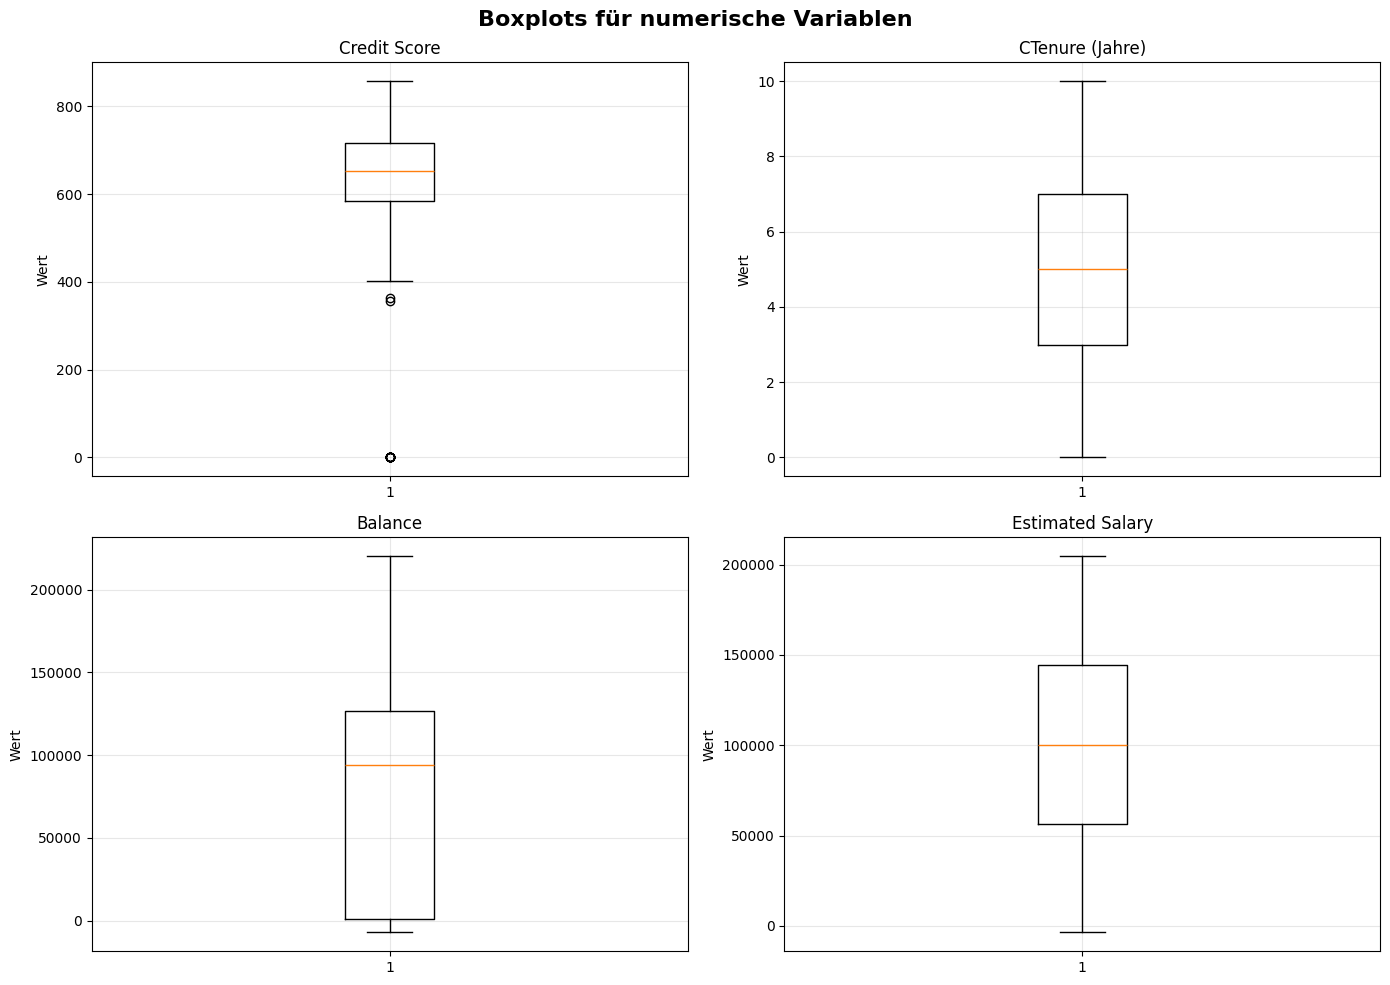

In [16]:
# Boxplots zur Identifikation von Outliers in den demografischen Daten (hint: hätte man auch mit allen Werten auf einmal machen können)
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle('Boxplots für numerische Variablen', fontsize=16, fontweight='bold')

# CCreditScore
axes[0, 0].boxplot(df['CCreditScore'])
axes[0, 0].set_title('Credit Score')
axes[0, 0].set_ylabel('Wert')
axes[0, 0].grid(True, alpha=0.3)

# CTenure
axes[0, 1].boxplot(df['CTenure'])
axes[0, 1].set_title('CTenure (Jahre)')
axes[0, 1].set_ylabel('Wert')
axes[0, 1].grid(True, alpha=0.3)

# CBalance
axes[1, 0].boxplot(df['CBalance'])
axes[1, 0].set_title('Balance')
axes[1, 0].set_ylabel('Wert')
axes[1, 0].grid(True, alpha=0.3)

# CEstimatedSalary
axes[1, 1].boxplot(df['CEstimatedSalary'])
axes[1, 1].set_title('Estimated Salary')
axes[1, 1].set_ylabel('Wert')
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

Zur Behandlung von Ausreißern (Outlier) gibt es verschiedene Methoden. Eine recht einfache Methode, die IQR - Methode soll hier zur Anwendung kommen. In der Praxis werden dabei meist Werte der Inter-Quartil-Range von 1.5 bis 3 angenommen. Aus dem obgigen Boxplot und der Berechnung (siehe unten) wird ersichtlich, dass ein iqr von 1,5 für die Spalte CCreditScore ausreichend ist.

In [17]:
# Berechne Inter Quantile Range (IQR) für CCreditScore
def inter_quartile_range(column: pd.Series, iqr: float=1.5) -> tuple:
    """
    Berechnet die Interquartilbereichsgrenzen für eine gegebene Spalte.
    Args:
        column (pd.Series): Die Spalte, für die die IQR-Grenzen berechnet werden sollen.
    Returns:
        tuple: Ein Tupel mit dem unteren und oberen Grenzwert des IQR.
    """
    Q3 = np.quantile(column, 0.75)
    Q1 = np.quantile(column, 0.25)
    IQR = Q3 - Q1
    lower_bound = Q1 - iqr * IQR
    upper_bound = Q3 + iqr * IQR
    return lower_bound, upper_bound

lower_bound, upper_bound = inter_quartile_range(df['CCreditScore'])

# Brechne Anzahl Zeilen vor Bearbeitung
rows_before = df.shape[0]

# Ausgabe der Werte und Grenzen (siehe auch Boxplot oben)
print("Der untere Wert des Kredit Scores liegt bei: ", df['CCreditScore'].min())
print("Die untere Grenze des Kredit Scores liegt bei: ", lower_bound)
print("Der obere Wert des Kredit Scores liegt bei: ", df['CCreditScore'].max())
print("Die obere Grenze des Kredit Scores liegt bei: ", upper_bound)

# Entferne Ausreißer mit der Inter-Quantile-Range (IQR)-Methode
df = df[(df['CCreditScore'] >= lower_bound) & (df['CCreditScore'] <= upper_bound)]

# Brechne Anzahl Zeilen nach Bearbeitung
rows_after = df.shape[0]

# Ausgabe
print("Es wurden insgesamt", rows_before - rows_after, "Zeilen entfernt.")

Der untere Wert des Kredit Scores liegt bei:  0.0
Die untere Grenze des Kredit Scores liegt bei:  384.99309032271367
Der obere Wert des Kredit Scores liegt bei:  857.4577549530931
Die obere Grenze des Kredit Scores liegt bei:  916.7261354238958
Es wurden insgesamt 15 Zeilen entfernt.


In [18]:
# Überprüfe die Werte für eine Kreditkarte (erlaubt: 0 oder 1)
print("Werte für CHasCrCard:", df['CHasCrCard'].unique())

# Überprüfe die Werte für eine aktive Mitgliedschaft (erlaubt: 0 oder 1)
print("Werte für CIsActiveMember:", df['CIsActiveMember'].unique())

Werte für CHasCrCard: [1 0]
Werte für CIsActiveMember: [0 1]


#### Überprüfe und Säubere Temporal & Behavioral Features

In [19]:
# Aufgrund von Redundanz und dem Vorschlag für die Spalte Account_Age_Months, werde ich diese entfernen
df.drop(['Days_Since_Onboarding'], axis=1, inplace=True)
print(df.columns)

Index(['Customer_ID', 'CCreditScore', 'CGeography', 'CGender', 'CAge',
       'CTenure', 'CBalance', 'CNumOfProducts', 'CHasCrCard',
       'CIsActiveMember', 'CEstimatedSalary', 'Account_Age_Months',
       'Avg_Monthly_Transactions', 'Transaction_Variance',
       'Last_Login_Days_Ago', 'Support_Tickets_Count',
       'Mobile_App_Usage_Hours', 'Onboarding_Month', 'Is_Holiday_Onboarding',
       'Churn', 'CLV_Continuous'],
      dtype='object')


In [20]:
# Überprüfe die Werte in der Spalte Onboarding_Month
print("Es gibt folgende Werte: ", df['Onboarding_Month'].unique(), "\n")

# Pattern-Matching
num_months = {1: "January", 2: "February", 3: "March", 4: "April", 5: "May", 6: "June", 7: "July",
            8: "August", 9: "September", 10: "October", 11: "November", 12: "December"}

seasons = {
    'Winter': ['December', 'January', 'February'],
    'Spring': ['March', 'April', 'May'],
    'Summer': ['June', 'July', 'August'],
    'Autumn': ['September', 'October', 'November']
}

# Mapping-Funktion für die Jahreszeiten
def get_season(month: int) -> str:
    month_name = num_months[month]
    for season, months in seasons.items():
        if month_name in months:
            return season
    return "Unknown"

# Neue Spalte season mit Jahreszeiten befüllen und zum Datensatz hinzufügen
df['season'] = df['Onboarding_Month'].apply(get_season).astype('category')

# Ausgabe (Summary)
print("Unique seasons assigned: ", df['season'].unique(), "\n")
print("Verteilung der Jahreszeiten:")
print(df['season'].value_counts())
print(f"\nEs wurden insgesamt {df.shape[0]} Zeilen mit Jahreszeiten befüllt.")

Es gibt folgende Werte:  [ 8 11  2  1  3  5  7 10  9  4  6 12] 

Unique seasons assigned:  ['Summer', 'Autumn', 'Winter', 'Spring']
Categories (4, object): ['Autumn', 'Spring', 'Summer', 'Winter'] 

Verteilung der Jahreszeiten:
season
Winter    2192
Summer    2184
Spring    2148
Autumn    2112
Name: count, dtype: int64

Es wurden insgesamt 8636 Zeilen mit Jahreszeiten befüllt.


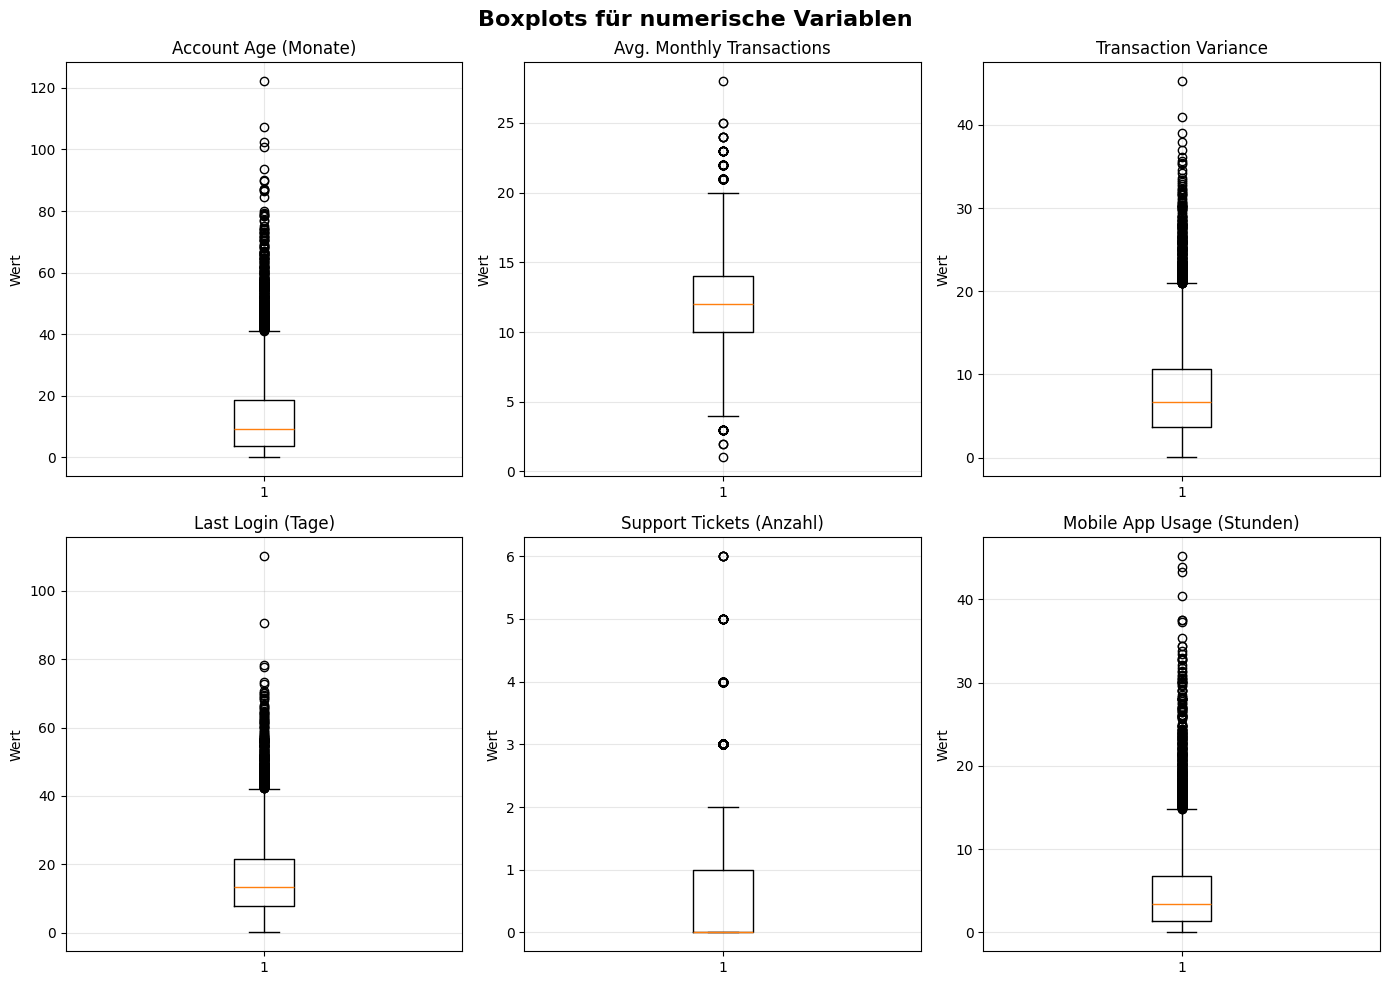

In [21]:
# Boxplots zur Identifikation von Ausreißern bei den Temporal & Behavioral Features
fig, axes = plt.subplots(2, 3, figsize=(14, 10))
fig.suptitle('Boxplots für numerische Variablen', fontsize=16, fontweight='bold')

# CAccount_Age_Months
axes[0, 0].boxplot(df['Account_Age_Months'])
axes[0, 0].set_title('Account Age (Monate)')
axes[0, 0].set_ylabel('Wert')
axes[0, 0].grid(True, alpha=0.3)

# CAvg_Monthly_Transactions
axes[0, 1].boxplot(df['Avg_Monthly_Transactions'])
axes[0, 1].set_title('Avg. Monthly Transactions')
axes[0, 1].set_ylabel('Wert')
axes[0, 1].grid(True, alpha=0.3)

# CTransaction_Variance
axes[0, 2].boxplot(df['Transaction_Variance'])
axes[0, 2].set_title('Transaction Variance')
axes[0, 2].set_ylabel('Wert')
axes[0, 2].grid(True, alpha=0.3)

# Last Login
axes[1, 0].boxplot(df['Last_Login_Days_Ago'])
axes[1, 0].set_title('Last Login (Tage)')
axes[1, 0].set_ylabel('Wert')
axes[1, 0].grid(True, alpha=0.3)

# Support Tickets
axes[1, 1].boxplot(df['Support_Tickets_Count'])
axes[1, 1].set_title('Support Tickets (Anzahl)')
axes[1, 1].set_ylabel('Wert')
axes[1, 1].grid(True, alpha=0.3)

# Mobile Usage
axes[1, 2].boxplot(df['Mobile_App_Usage_Hours'])
axes[1, 2].set_title('Mobile App Usage (Stunden)')
axes[1, 2].set_ylabel('Wert')
axes[1, 2].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

Insgesamt beginnen Werte minimum bei 0. Die Spalte "Account_Age_Months" wird nicht mit IQR behandelt, da es sich bei Ausreißern um Langzeitkunden handeln könnte. Demnach würden wichtige Informationen entfernt. Genauso würden Kunden, die lange nicht eingeloggt waren, aber nicht gekündigt haben, ein besonderes Nutzungsmuster darstellen. Ggf. sind dies "passive" Kunden, die das Konto behalten, aber kaum nutzen. Für die Anzahl der Tickets würde ich eine IQR von 3 vorschlagen (nicht so extrem). Mehr Tickets könnten darauf hindeuten, dass es zu Fehlern beim erstellen gekommen ist, wie zum Beispiel durch Duplikate oder es wurden Tickets abgesendet, aber nicht richtig ausgefüllt (Neuerstellung notwendig für die gleiche Transaktion). Bei den App-Nutzern würde ich die Werte belassen. Es gibt eben Personen die sehr oft auf ihr Konto schauen und Personen die dies weniger tun. Insgesamt gibt es keine rießigen Ausreißer. Deshalb erscheinen die Daten valide. Die monatlichen Transaktionen könnten mit der IQR - Methode bereinigt werden. Dadurch würde die Varianz der Transaktionen weniger streuen.  

In [22]:
# Zähle die Anzahl der Zeilen vor der Bearbeitung
rows_before = df.shape[0]

# Berechne Inter Quantile Range (IQR) für Support_Tickets_Count
lower_bound, upper_bound = inter_quartile_range(column=df['Support_Tickets_Count'], iqr=3)
print("Support_Tickets_Count - Untere Grenze:", lower_bound)
print("Support_Tickets_Count - Obere Grenze:", upper_bound)

# Entferne Ausreißer mit der Inter-Quantile-Range (IQR)-Methode
df = df[(df['Support_Tickets_Count'] >= lower_bound) & (df['Support_Tickets_Count'] <= upper_bound)]

# Zähle die Anzahl der Zeilen nach der Bearbeitung
rows_after = df.shape[0]

# Ausgabe
print("Es wurden insgesamt", rows_before - rows_after, "Zeilen entfernt.")

Support_Tickets_Count - Untere Grenze: -3.0
Support_Tickets_Count - Obere Grenze: 4.0
Es wurden insgesamt 18 Zeilen entfernt.


In [23]:
# Zähle die Anzahl der Zeilen vor der Bearbeitung
rows_before = df.shape[0]

# Berechne Inter Quantile Range (IQR) für Avg_Monthly_Transactions
lower_bound, upper_bound = inter_quartile_range(column=df['Avg_Monthly_Transactions'], iqr=1.5)
print("Avg_Monthly_Transactions - Untere Grenze:", lower_bound)
print("Avg_Monthly_Transactions - Obere Grenze:", upper_bound)

# Entferne Ausreißer mit der Inter-Quantile-Range (IQR)-Methode
df = df[(df['Avg_Monthly_Transactions'] >= lower_bound) & (df['Avg_Monthly_Transactions'] <= upper_bound)]

# Zähle die Anzahl der Zeilen nach der Bearbeitung
rows_after = df.shape[0]

# Ausgabe
print("Es wurden insgesamt", rows_before - rows_after, "Zeilen entfernt.")

Avg_Monthly_Transactions - Untere Grenze: 4.0
Avg_Monthly_Transactions - Obere Grenze: 20.0
Es wurden insgesamt 108 Zeilen entfernt.


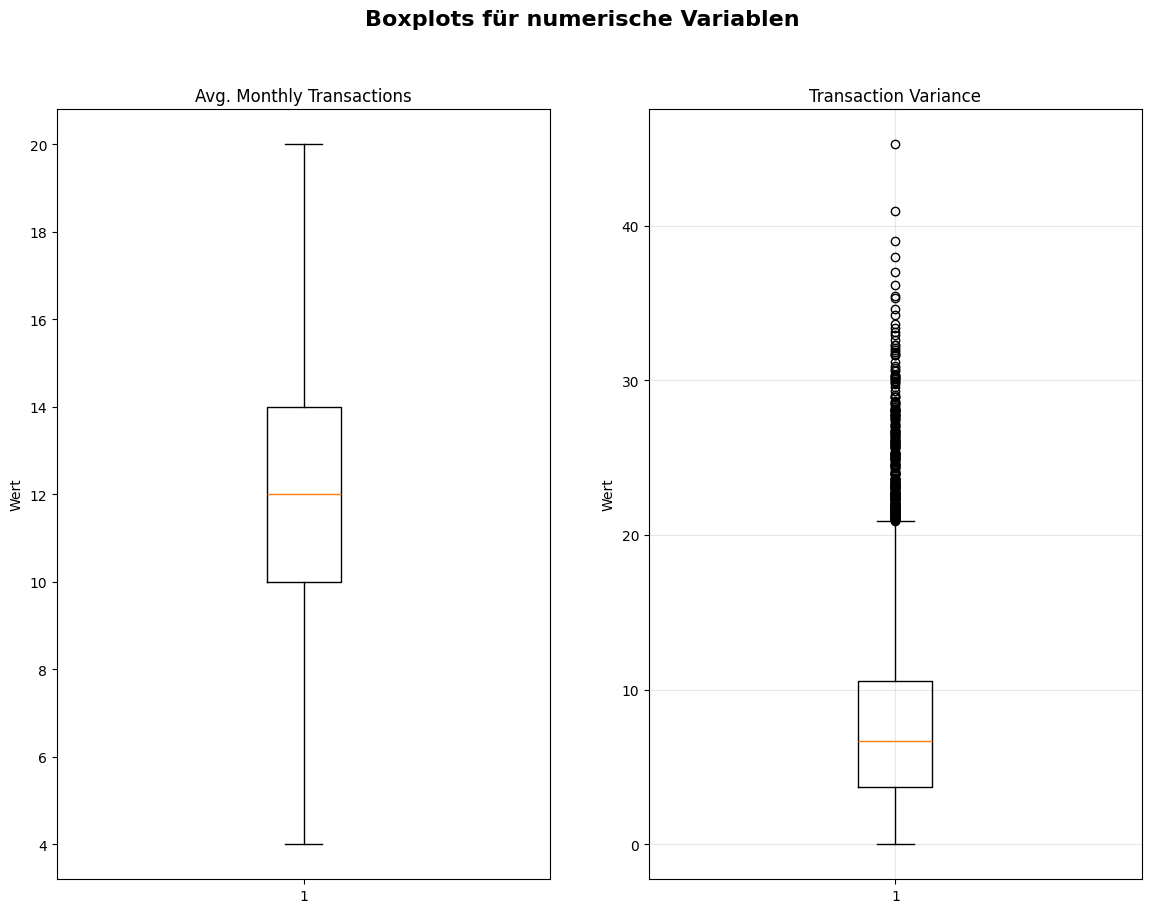

In [24]:
# Boxplots zur Identifikation von Ausreißern zur Überprüfung
fig, axes = plt.subplots(1, 2, figsize=(14, 10))
fig.suptitle('Boxplots für numerische Variablen', fontsize=16, fontweight='bold')

# CAvg_Monthly_Transactions
axes[0].boxplot(df['Avg_Monthly_Transactions'])
axes[0].set_title('Avg. Monthly Transactions')
axes[0].set_ylabel('Wert')

# CTransaction_Variance
axes[1].boxplot(df['Transaction_Variance'])
axes[1].set_title('Transaction Variance')
axes[1].set_ylabel('Wert')
axes[1].grid(True, alpha=0.3)

Mit IQR von 1.5 wurden insgesamt zwar 108 Zeilen entfernt, aber die monatliche Transaktionsrate besteht nun ohne Ausreißer. Insgesamt können Transaktionen zwar einen niedrigen Durchschnitt (z.B. 5 Transaktionen/Monat), aber eine hohe Varianz haben (mal 0, mal 15 Transaktionen). Dabei handelt es sich um ein legitimes Verhaltensmuster und keinen Fehler. Beispielsweise würde ein Student selten Transaktionen ausführen (niedriger Avg). Sobald er Geld bekommt, würde er viele Transaktionen durchführen (hohe Varianz). Weitere Beispiele erklären sich von selbst. Demnach ist die Variance mehr oder weniger vairabel/flexibel und besitzt eine höhere Anzahl von "Ausreißern". Aus diesem Grund würde ich die Varianz auch nicht weiter behandeln.

#### Überprüfe und Säubere Target Variables

Es gibt für die Spalte Churn insgesamt folgende Werte: [0 1] 

Es wurden insgesamt folgende Churn-Kategorien gefunden: ['No Churn', 'Churn']
Categories (2, object): ['Churn', 'No Churn'] 

Es wurden insgesamt: 8510 Zeilen hinzugefügt. Von insgesamt: 8510 



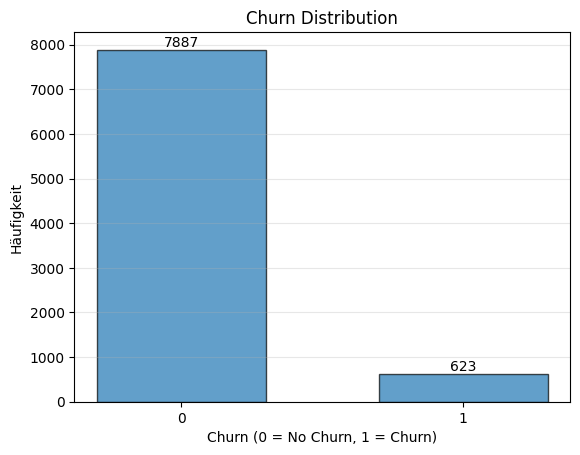

In [25]:
# Überprüfe die Spalte Churn
print("Es gibt für die Spalte Churn insgesamt folgende Werte:", df['Churn'].unique(), "\n")

# Füge eine neue (extra) Spalte Churn_Category zum Datensatz hinzu
df['Churn_Category'] = df['Churn'].apply(lambda x: 'No Churn' if x == 0 else 'Churn' if x == 1 else 'Unknown').astype('category')

# Prüfe die neue Spalte Churn_Category
print("Es wurden insgesamt folgende Churn-Kategorien gefunden:", df['Churn_Category'].unique(), "\n")
print("Es wurden insgesamt:", len(df['Churn_Category']), "Zeilen hinzugefügt. Von insgesamt:", df.shape[0], "\n")

# BarChart der Spalte Churn mit den Klassen 0 und 1
churn_counts = df['Churn'].value_counts().sort_index()
bars = plt.bar(churn_counts.index, churn_counts.values, edgecolor='black', alpha=0.7, width=0.6)
plt.title('Churn Distribution')
plt.xlabel('Churn (0 = No Churn, 1 = Churn)')
plt.ylabel('Häufigkeit')
plt.xticks([0, 1])
plt.grid(axis='y', alpha=0.3)
bars = plt.bar_label(bars, fmt='%d')
plt.show()

Das sog. "target label" für Churn ist unbalanciert. Nur rund 7,9% der Datensätze sind Churn = 1. D. h. wenig Kunden wandern ab (positiv). Im Gegensatz dazu sind No Churn labels mit 92,1% im Datensatz vertreten. Das bedeutet die Machine Learning Modelle werden Churns (Minderheitsklasse) nicht gut bzw. richtig prädizieren. Folglich würde die Accuracy zwar hoch ausfallen, aber nur, weil die Mehrheitsklasse richtig prädiziert würde. Anders ausgedrückt würde überwiegend die Mehrheitsklasse richtig präziziert werden. Ellgemein sollte eine Accuracy von z.B. über 90% jeden Anwender eher stutzig machen. 

Eine Methode damit umzugehen ist SMOTE (Synthetic minority oversampling technique). Hierbei werden synthetische Daten erzeugt, ohne ein overfitting, also eine Überanpassung, des Modells zu erzeugen. Im Gegensatz dazu führt ein Resampling (Random-Oversamplig) eher zur Überanpassung des Modells. Eine weitere Methode wäre das sog. Undersampling, bei dem Daten aus der Mehrheitsklasse entfernt würden, bis eine gleichmäßige Durchmischung erreciht ist. Dadurch würde die Gesamtzahl der Samples minimiert und der Datensatz insgesamt kleiner werden. Schließlich würde ich mich für SMOTE entscheiden, wenn ich zu task 2 gelange und feststelle, dass die Performance der Modelle nicht gut ist.

Hinweis: Random Forests und die Logistische Regression werden als Modelle deklariert, die gut mit kleinen und unbalancierten Datensätzen umgehen können.

[source1](https://www.youtube.com/watch?v=GR-OW5asKlk)

[source2](https://www.youtube.com/watch?v=flhjn6e6wnY)

Es gibt für die Spalte CLV_Continuous insgesamt folgende Werte: [21696.25602216 15918.89112843 10361.31577344 ... 24433.26710959
  7194.89713234 19968.86948953] 

Datentyp: float64 



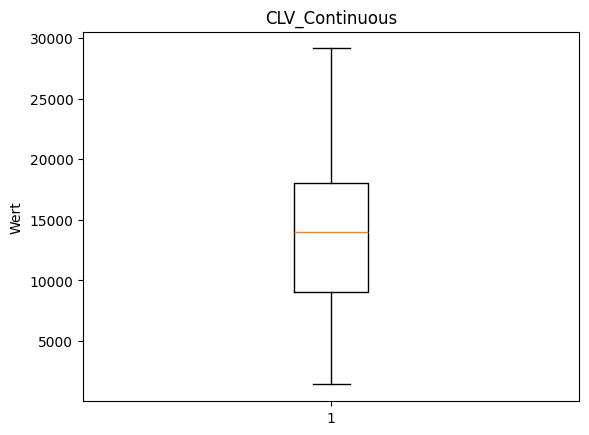

In [26]:
# Überprüfe die Spalte CLV_Continuous
print("Es gibt für die Spalte CLV_Continuous insgesamt folgende Werte:", df['CLV_Continuous'].unique(), "\n")
print("Datentyp:", df['CLV_Continuous'].dtype, "\n")

# Boxplot der Spalte CLV_Continuous
plt.boxplot(df['CLV_Continuous'])
plt.title('CLV_Continuous')
plt.ylabel('Wert')
plt.show()

Die Zielvariablen haben keine Ausreißer und besitzen die erwarteten Werte lt. Beschreibung. Sie bedürfen daher keiner weiteren Bearbeitung bzw. Säuberung. 

In [27]:
# Zeige die Anzahl der Zeilen, die durch das Data-Cleaning beseitigt werden mussten
rows_at_end = df.shape[0]

print("Es wurden insgesamt:", rows_at_begin - rows_at_end, "Zeilen durch das Data-Cleaning entfernt.")
print("Der Datensatz enthält nun insgesamt:", df.shape[0], "Zeilen und", df.shape[1], "Spalten.")

# write back to csv
df.to_csv("./data/dataset_cleaned.csv", index=False)

Es wurden insgesamt: 152 Zeilen durch das Data-Cleaning entfernt.
Der Datensatz enthält nun insgesamt: 8510 Zeilen und 23 Spalten.


An dieser Stelle ist das sog. Data-Cleaning abgeschlossen!